<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [2]:
data = pd.read_csv('data/titanium.csv', sep=',')

In [3]:
data = (data - data.mean()) / data.std()

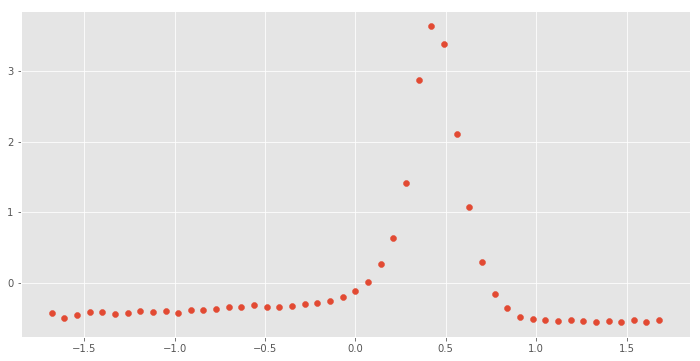

In [4]:
plt.scatter(data['x'], data['y'])

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

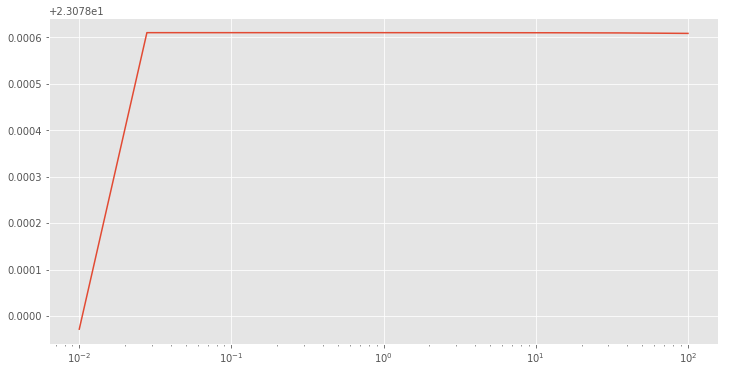

In [7]:
errors = []

for c in np.logspace(-2, 2, 10):
    svr = SVR(kernel='linear', degree=1, C=c, epsilon=0.01)
    svr.fit(data['x'].reshape(-1,1), data['y'].reshape(-1,1))
    err = sum(abs(svr.predict(data['x'].reshape(-1,1)) - data['y']))
    
    errors.append(err)

plt.semilogx(np.logspace(-2, 2, 10), errors)

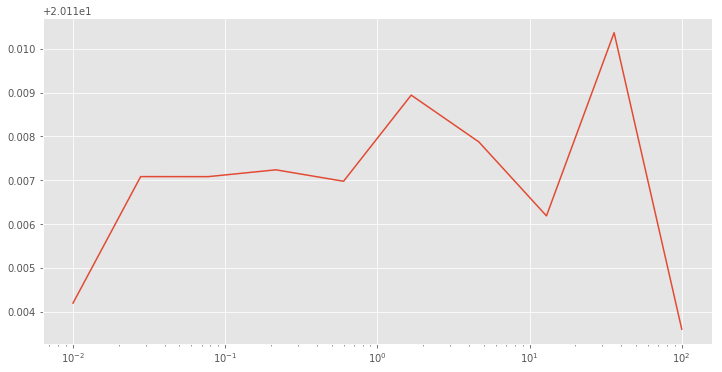

In [8]:
errors = []

for c in np.logspace(-2, 2, 10):
    svr = SVR(kernel='poly', degree=3, gamma=6, coef0=1, C=c, epsilon=0.01)
    svr.fit(data['x'].reshape(-1,1), data['y'].reshape(-1,1))
    err = sum(abs(svr.predict(data['x'].reshape(-1,1)) - data['y']))
    
    errors.append(err)

plt.semilogx(np.logspace(-2, 2, 10), errors)

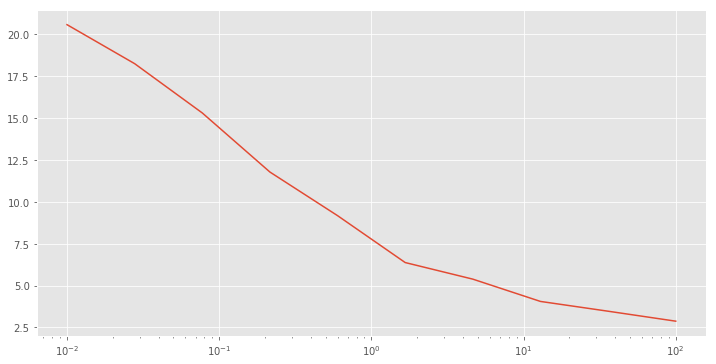

In [9]:
errors = []

for c in np.logspace(-2, 2, 10):
    svr = SVR(kernel='rbf', gamma = 6, coef0 = 1, C=c, epsilon=0.01)
    svr.fit(data['x'].reshape(-1,1), data['y'].reshape(-1,1))
    err = sum(abs(svr.predict(data['x'].reshape(-1,1)) - data['y']))
    
    errors.append(err)

plt.semilogx(np.logspace(-2, 2, 10), errors)

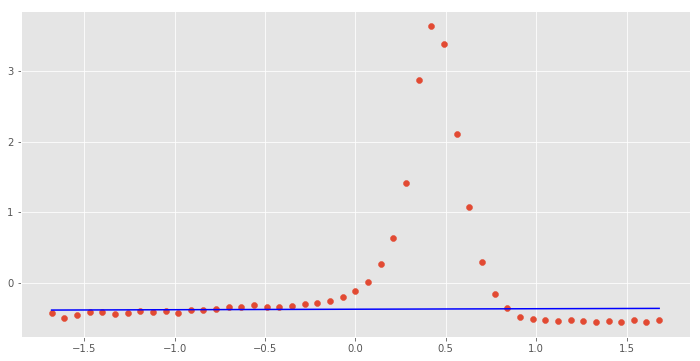

In [10]:
svr = SVR(kernel='linear', degree=1, C=0.01, epsilon=0.01)
svr.fit(data['x'].reshape(-1,1), data['y'].reshape(-1,1))

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], svr.predict(data['x'].reshape(-1,1)), color='b')

# понятно, прямой это дело не приблизишь...

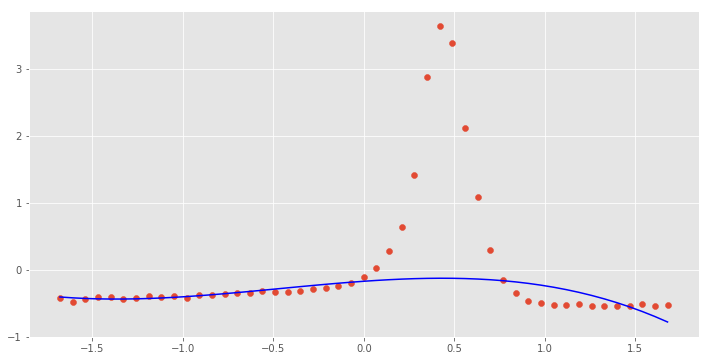

In [11]:
svr = SVR(kernel='poly', degree=3, gamma=6, coef0=1, C=100, epsilon=0.01)
svr.fit(data['x'].reshape(-1,1), data['y'].reshape(-1,1))

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], svr.predict(data['x'].reshape(-1,1)), color='b')

# не то, чтоб недообучились, но сойдет

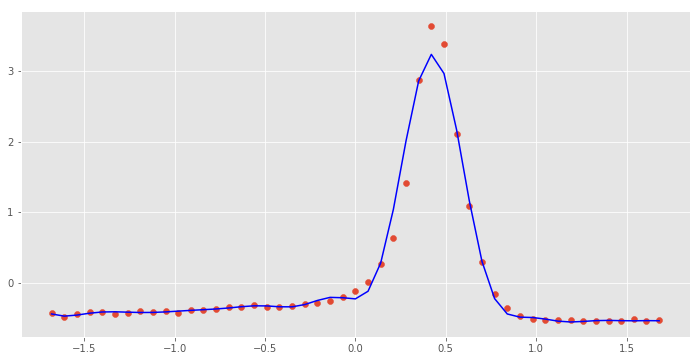

In [12]:
svr = SVR(kernel='rbf', gamma = 6, coef0 = 1, C=100, epsilon=0.01)
svr.fit(data['x'].reshape(-1,1), data['y'].reshape(-1,1))

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], svr.predict(data['x'].reshape(-1,1)), color='b')

# переобучились

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [13]:
data1 = pd.read_csv('data/war_and_peace_en.txt', header=None)
data1['label'] = 1
data2 = pd.read_csv('data/war_and_peace_es.txt', header=None)
data2['label'] = 0

In [14]:
df = data1.append(data2)
df['word'] = df[0]
df = df.drop([0], axis=1)

In [15]:
df.head()

,label,word
0,1,war
1,1,and
2,1,peace
3,1,leo
4,1,tolstoy


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
RND_SEED = 1234

In [18]:
df = df.reset_index().drop('index', axis=1)

In [19]:
np.random.seed(RND_SEED)
df = df.iloc[np.random.permutation(df.shape[0])]
df = df.reset_index().drop('index', axis=1).iloc[0:2000]
df = df.reset_index()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['index'], df['label'], test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [21]:
from pylev import levenschtein

In [22]:
def string_kernel(U, V):
    #Your Code Here
    return [[np.exp(-levenschtein(s, t)**2) for s in df.iloc[U[:,0]]['word']] for t in df.iloc[V[:,0]]['word']]
G = string_kernel(X_train.reshape(-1,1), X_train.reshape(-1,1))

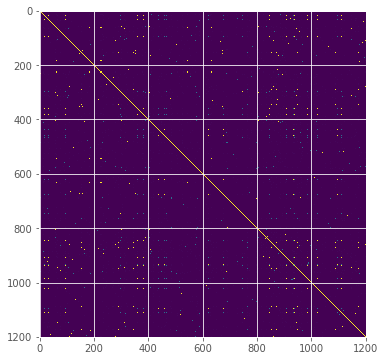

In [23]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
G1 = string_kernel(X_train.reshape(-1,1), X_test.reshape(-1,1))

In [32]:
for c in np.arange(0.1, 2, 0.1):
    svc = SVC(kernel='precomputed', C=c)
    svc.fit(G, y_train)
    print accuracy_score(y_train, svc.predict(G))

0.646666666667
0.699166666667
0.741666666667
0.7975
0.825
0.973333333333
0.984166666667
0.986666666667
0.986666666667
0.988333333333
0.988333333333
0.989166666667
0.989166666667
0.989166666667
0.989166666667
0.989166666667
0.989166666667
0.989166666667
0.989166666667


In [42]:
svc = SVC(kernel='precomputed', C=1.3)

In [43]:
svc.fit(G, y_train)

SVC(C=1.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
accuracy_score(y_train, svc.predict(G))

0.98916666666666664

In [45]:
# стараться делать 70% мы, конечно же, не будем ;)
accuracy_score(y_test, svc.predict(G1))

0.82374999999999998